<p style="text-align: center;"><strong><span style="font-size: 24pt">Stock Market Movement Prediction</span></strong></p>

In [6]:
import pandas as pd
import numpy as np

In [127]:
df=pd.read_csv("stock_data_cleaned.csv")

In [113]:
df.shape

(10000, 13)

In [115]:
df.head()

,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate,Target
0,0.374639,0.374780,0.373510,0.378390,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,0.580868,0.038604,0
1,0.950982,0.937746,0.938422,0.946158,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,0.527044,0.108908,0
2,0.732198,0.719825,0.723644,0.723158,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,0.351052,0.432540,0
3,0.598823,0.599865,0.596973,0.605322,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,0.493274,0.946349,0
4,0.156053,0.163410,0.155891,0.166084,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,0.365116,0.074867,0


In [117]:
df.isnull().sum()

Open               0
Close              0
High               0
Low                0
Volume             0
RSI                0
MACD               0
Bollinger_Upper    0
Bollinger_Lower    0
Sentiment_Score    0
GDP_Growth         0
Inflation_Rate     0
Target             0
dtype: int64

In [119]:
df.describe()

,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.494293,0.495067,0.493072,0.497314,0.496869,0.503171,0.501809,0.496134,0.492211,0.495362,0.500334,0.501918,0.05950
std,0.287715,0.281587,0.284019,0.283283,0.289297,0.288361,0.287825,0.276432,0.276758,0.287750,0.288366,0.290510,0.23657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.246390,0.251759,0.247605,0.252727,0.244266,0.256966,0.253762,0.256406,0.253212,0.244864,0.246618,0.249640,0.00000
50%,0.492662,0.492477,0.491295,0.495413,0.493722,0.506117,0.504232,0.493400,0.489197,0.496597,0.503139,0.502395,0.00000
75%,0.740212,0.736107,0.736170,0.739736,0.750494,0.753489,0.752636,0.732336,0.729294,0.742288,0.750093,0.756607,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             10000 non-null  float64
 1   Close            10000 non-null  float64
 2   High             10000 non-null  float64
 3   Low              10000 non-null  float64
 4   Volume           10000 non-null  float64
 5   RSI              10000 non-null  float64
 6   MACD             10000 non-null  float64
 7   Bollinger_Upper  10000 non-null  float64
 8   Bollinger_Lower  10000 non-null  float64
 9   Sentiment_Score  10000 non-null  float64
 10  GDP_Growth       10000 non-null  float64
 11  Inflation_Rate   10000 non-null  float64
 12  Target           10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


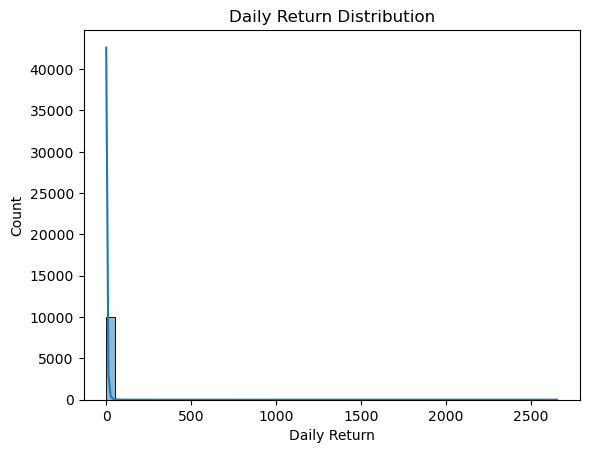

In [123]:
## Daily Return Distribution
df['Daily Return'] = df['Close'].pct_change()
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Daily Return Distribution')
plt.show()

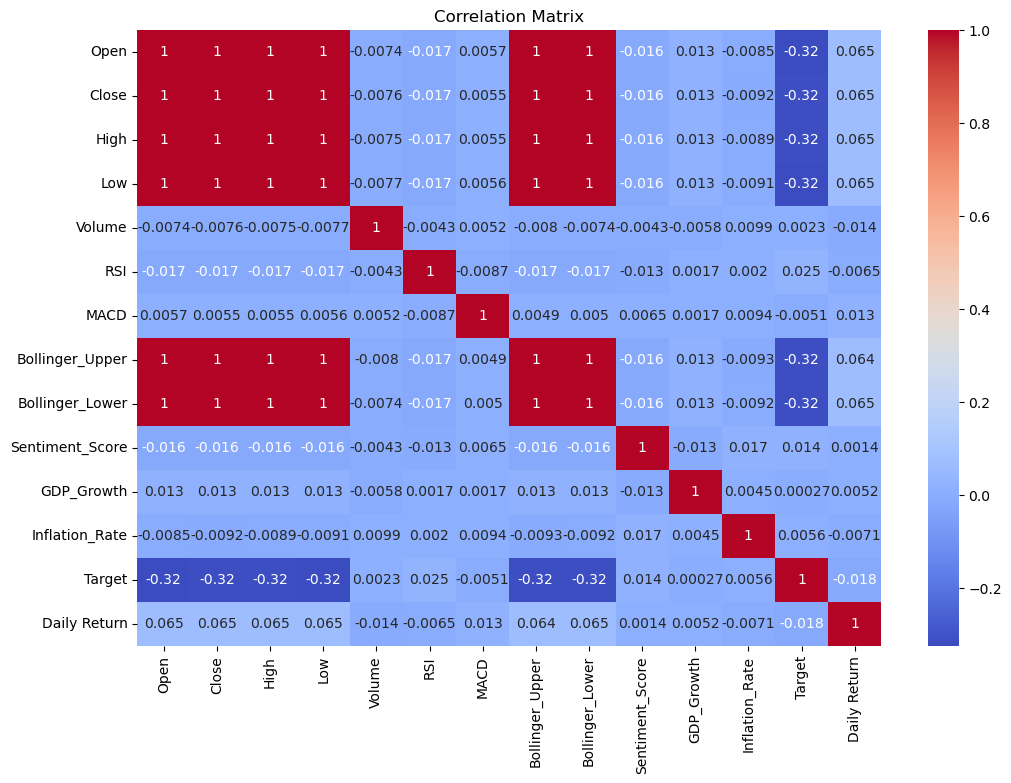

In [125]:
## Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Training

In [20]:
df['combined_news'] = df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row.values.astype(str)), axis=1)

In [22]:
df.dropna(inplace=True)

In [24]:
from sklearn.model_selection import train_test_split

X = df['combined_news']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## 1. Logistic Regression

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train_vec, y_train)
log_pred = log_model.predict(X_test_vec)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
acc_log = accuracy_score(y_test, log_pred)
cm_log = confusion_matrix(y_test, log_pred)
cr_log = classification_report(y_test, log_pred, output_dict=True)

In [39]:
print("Logistic Regression")

Logistic Regression


In [41]:
print("Accuracy:", acc_log)

Accuracy: 0.4798994974874372


In [43]:
print("Classification Report:\n", classification_report(y_test, log_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.21      0.28       187
           1       0.51      0.72      0.59       211

    accuracy                           0.48       398
   macro avg       0.45      0.46      0.44       398
weighted avg       0.46      0.48      0.45       398



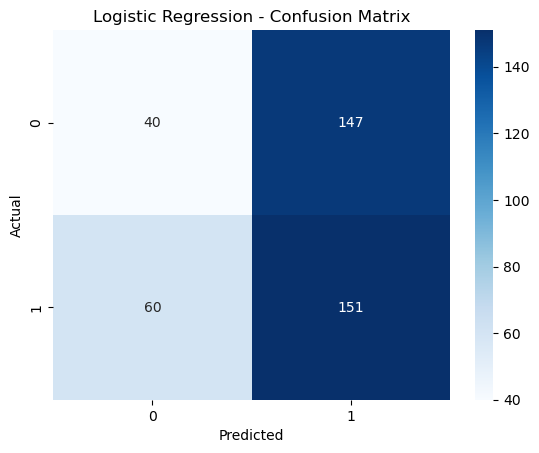

In [45]:
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

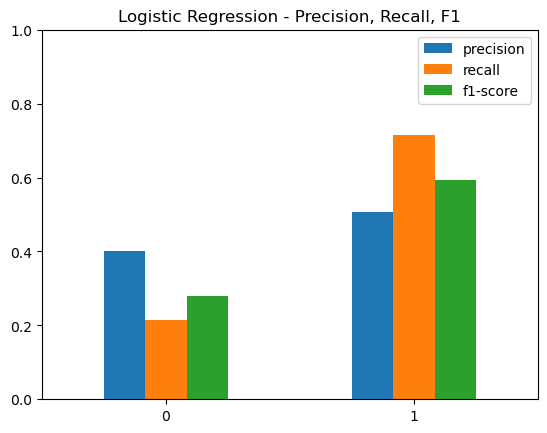

In [47]:
metrics = pd.DataFrame(cr_log).transpose().iloc[:2, :-1]
metrics.plot(kind='bar', title='Logistic Regression - Precision, Recall, F1')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

## 2. Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)

In [54]:
acc_nb = accuracy_score(y_test, nb_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cr_nb = classification_report(y_test, nb_pred, output_dict=True)

In [56]:
print("Multinomial Naive Bayes")

Multinomial Naive Bayes


In [58]:
print("Accuracy:", acc_nb)

Accuracy: 0.49748743718592964


In [60]:
print("Classification Report:\n", classification_report(y_test, nb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.06      0.11       187
           1       0.52      0.88      0.65       211

    accuracy                           0.50       398
   macro avg       0.42      0.47      0.38       398
weighted avg       0.43      0.50      0.40       398



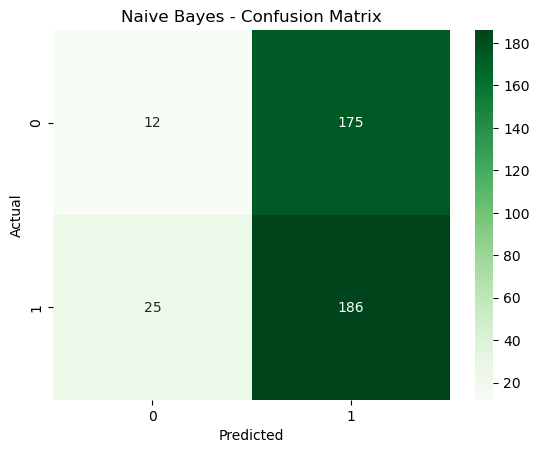

In [62]:
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

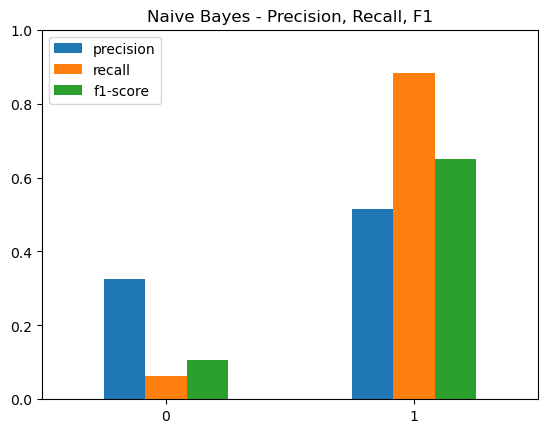

In [66]:
metrics = pd.DataFrame(cr_nb).transpose().iloc[:2, :-1]
metrics.plot(kind='bar', title='Naive Bayes - Precision, Recall, F1')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

## 3. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [71]:
lin_model = LinearRegression()
lin_model.fit(X_train_vec, y_train)
lin_pred = lin_model.predict(X_test_vec)

In [73]:
lin_pred_class = [1 if x > 0.5 else 0 for x in lin_pred]

In [75]:
acc_lin = accuracy_score(y_test, lin_pred_class)
cm_lin = confusion_matrix(y_test, lin_pred_class)
cr_lin = classification_report(y_test, lin_pred_class, output_dict=True)

In [77]:
print("Linear Regression (as classifier)")

Linear Regression (as classifier)


In [79]:
print("Accuracy:", acc_lin)

Accuracy: 0.4899497487437186


In [81]:
print("Classification Report:\n", classification_report(y_test, lin_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.42      0.44       187
           1       0.52      0.55      0.53       211

    accuracy                           0.49       398
   macro avg       0.49      0.49      0.49       398
weighted avg       0.49      0.49      0.49       398



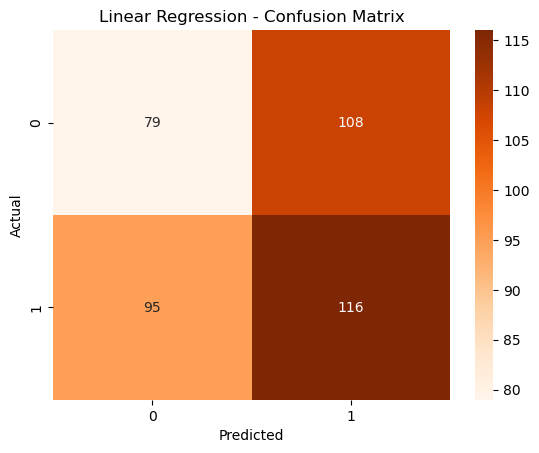

In [83]:
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Oranges')
plt.title("Linear Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

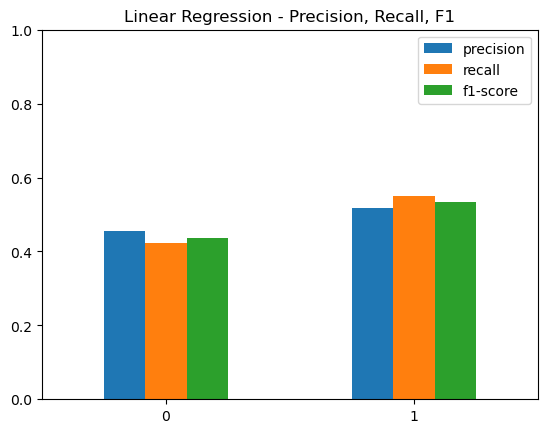

In [85]:
metrics = pd.DataFrame(cr_lin).transpose().iloc[:2, :-1]
metrics.plot(kind='bar', title='Linear Regression - Precision, Recall, F1')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

## 4. Random Forest Classifier


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

rf_pred = rf_model.predict(X_test_vec)

In [91]:
acc_rf = accuracy_score(y_test, rf_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cr_rf = classification_report(y_test, rf_pred, output_dict=True)

In [92]:
print("Random Forest Classifier")

Random Forest Classifier


In [93]:
print("Accuracy:", acc_rf)

Accuracy: 0.4798994974874372


In [94]:
print("Classification Report:\n", classification_report(y_test, rf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.22      0.29       187
           1       0.51      0.71      0.59       211

    accuracy                           0.48       398
   macro avg       0.46      0.47      0.44       398
weighted avg       0.46      0.48      0.45       398



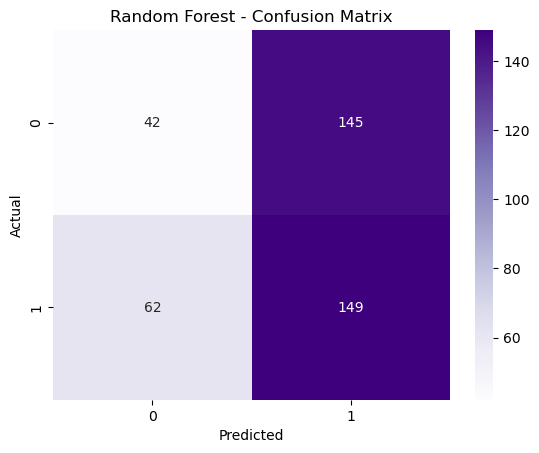

In [100]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

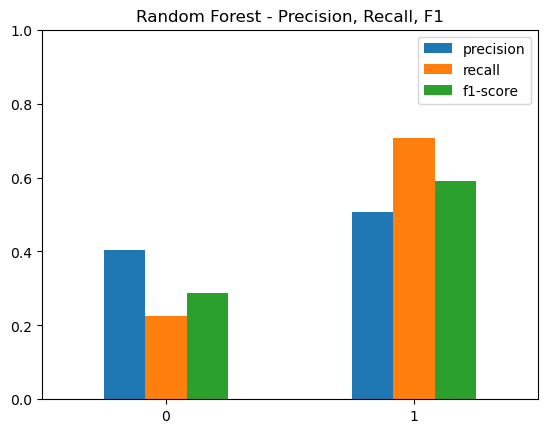

In [104]:
metrics = pd.DataFrame(cr_rf).transpose().iloc[:2, :-1]
metrics.plot(kind='bar', title='Random Forest - Precision, Recall, F1')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

In [106]:
sample = ["Stocks rise as tech sector bounces back",
          "Stock market crashes amid economic meltdown"]

sample_vec = vectorizer.transform(sample)

# Choose best model based on accuracy
best_model = nb_model
predictions = best_model.predict(sample_vec)

print("\nPredictions for sample headlines:")
for headline, pred in zip(sample, predictions):
    print(f"Headline: {headline}")
    print(f"Predicted Movement: {'Up' if pred == 1 else 'Down'}\n")


Predictions for sample headlines:
Headline: Stocks rise as tech sector bounces back
Predicted Movement: Up

Headline: Stock market crashes amid economic meltdown
Predicted Movement: Down

